##### Installing packages 

In [1]:
#conda install -c conda-forge fbprophet
import pandas as pd
import pystan
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("milk.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [4]:
df.drop(168,inplace=True)

In [5]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


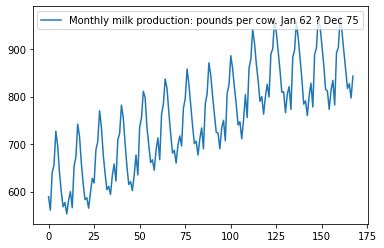

In [6]:
df.plot()

In [7]:
df.columns=['ds','y']
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df['ds']=pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


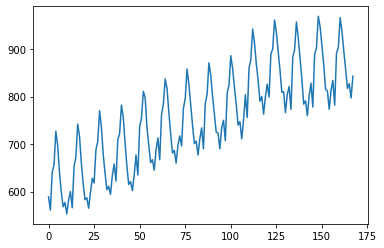

In [10]:
df['y'].plot()

In [11]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


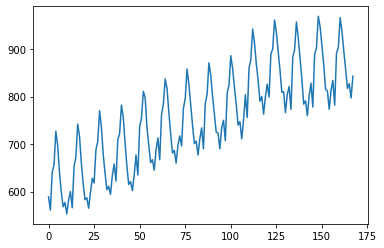

In [12]:
df['y'].plot()

In [13]:
from fbprophet import Prophet

In [14]:
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
 model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [16]:
# Creating a future dates of 365 days
futr_dates=model.make_future_dataframe(periods=365)

In [17]:
pred=model.predict(futr_dates)

In [18]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,577.286036,597.316656,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,535.846075,556.323603,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,631.305785,651.683373,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,647.981403,668.706493,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,711.507198,730.653979,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045


In [19]:
pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
528,1976-11-26,875.143414,804.344387,826.413783,870.698518,880.156187,-59.972681,-59.972681,-59.972681,-59.972681,-59.972681,-59.972681,0.0,0.0,0.0,815.170733
529,1976-11-27,875.161832,806.920528,829.570242,870.692486,880.192662,-56.771512,-56.771512,-56.771512,-56.771512,-56.771512,-56.771512,0.0,0.0,0.0,818.390320
530,1976-11-28,875.180250,811.478644,832.935593,870.686454,880.229012,-53.400510,-53.400510,-53.400510,-53.400510,-53.400510,-53.400510,0.0,0.0,0.0,821.779740
531,1976-11-29,875.198668,813.873282,836.791532,870.680490,880.265363,-49.922769,-49.922769,-49.922769,-49.922769,-49.922769,-49.922769,0.0,0.0,0.0,825.275899
532,1976-11-30,875.217086,816.632983,839.418215,870.675460,880.303413,-46.408242,-46.408242,-46.408242,-46.408242,-46.408242,-46.408242,0.0,0.0,0.0,828.808844


In [20]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.745106,577.286036,597.316656
1,1962-02-01,546.026015,535.846075,556.323603
2,1962-03-01,641.535653,631.305785,651.683373
3,1962-04-01,658.585263,647.981403,668.706493
4,1962-05-01,721.562045,711.507198,730.653979


Plotting the predictions..
Here the blue line represents the predicted values and the black dots represents the data of our datasets.

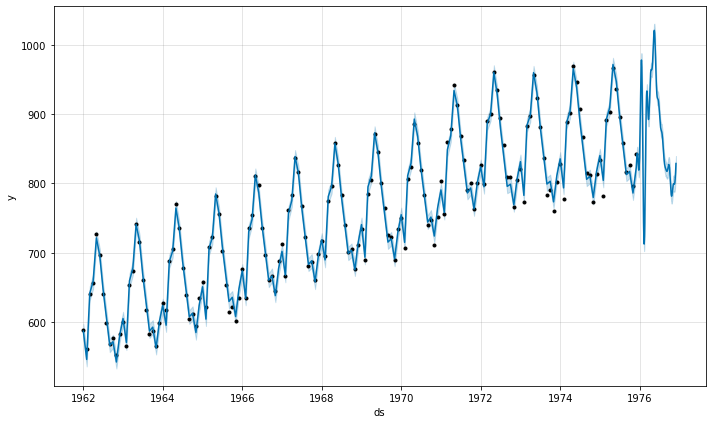

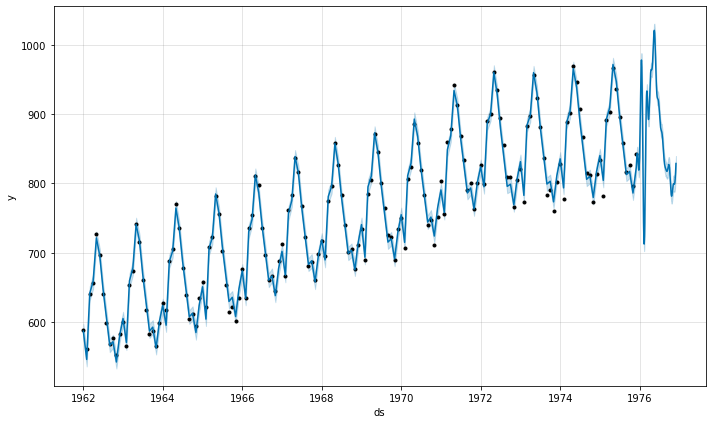

In [21]:
# ploting the pridections
model.plot(pred)

##### Visualizing the components..

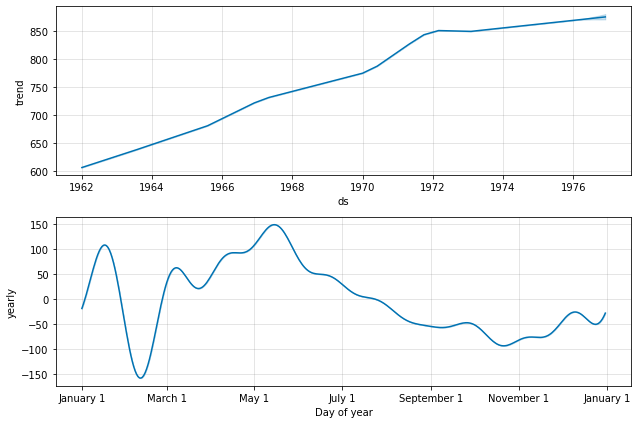

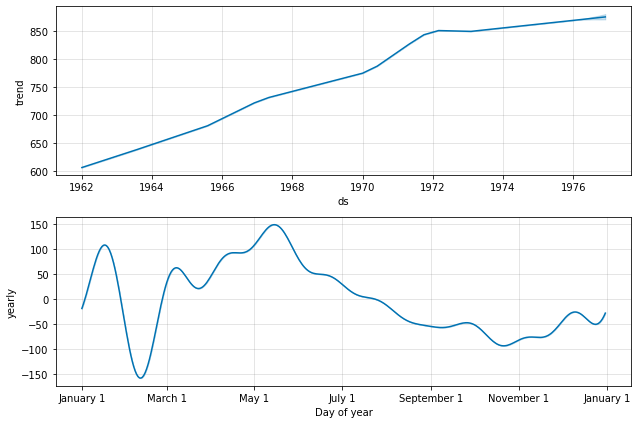

In [22]:
model.plot_components(pred)

Let we measure the forecast error by comparing the predicted values with actual
values. To perform this operation we select cuttoff points in the data and fit 
the model upto that cuttoff points, then we comapre the predicted values with
actual values. In Prophet we will do this using cross_validation.
The above mentioned method takes:
    1. horizon- the forecast horizon
    2. initial size - of initial training period
    3. period- The spacing b/w cutoff dates

In [23]:
from fbprophet.diagnostics import cross_validation

In [24]:
365/2

182.5

In [25]:
365*3

1095

In [26]:
cv_df=cross_validation(model,horizon="365 days",period="182 days", initial="1095 days")

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-06-13 00:00:00 and 1974-12-01 00:00:00


In [27]:
cv_df.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-07-01,695.455299,693.166977,697.959643,702.0,1965-06-13
1,1965-08-01,654.030146,651.200947,657.091496,653.0,1965-06-13
2,1965-09-01,619.021579,614.877386,623.420943,615.0,1965-06-13
3,1965-10-01,625.553381,619.512353,632.392230,621.0,1965-06-13
4,1965-11-01,607.333834,598.714800,616.355895,602.0,1965-06-13


##### Getting the performance metrics 
like rmse , mean absolute error(mae), mape(mean absolute % error)

In [28]:
from fbprophet.diagnostics import performance_metrics
performance=performance_metrics(cv_df)

In [29]:
performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,51 days,224.711194,14.990370,11.133834,0.014076,0.011451,0.333333
1,52 days,250.765910,15.835590,11.938160,0.015302,0.013247,0.333333
2,53 days,252.052547,15.876163,12.255435,0.015710,0.013722,0.270833
3,54 days,260.658509,16.144922,12.652387,0.016165,0.013722,0.250000
4,55 days,276.190228,16.618972,13.386101,0.017165,0.015434,0.208333


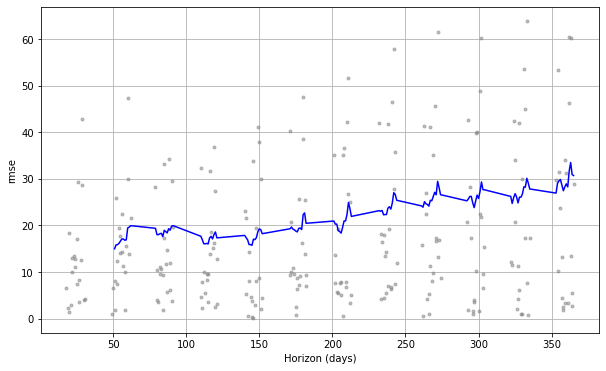

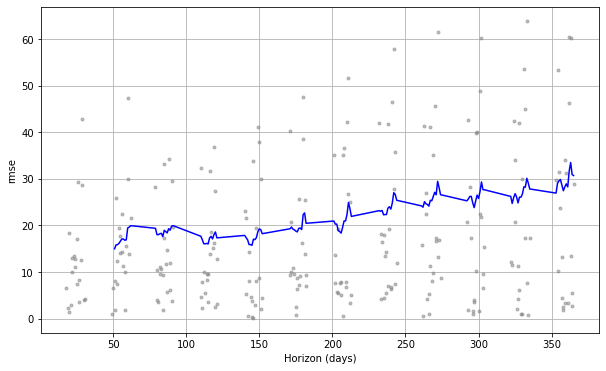

In [30]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_df,metric='rmse')

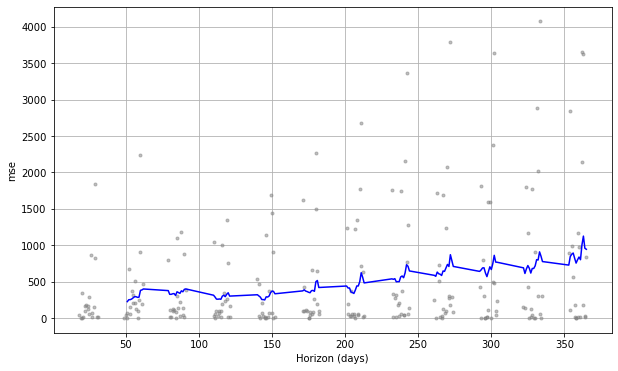

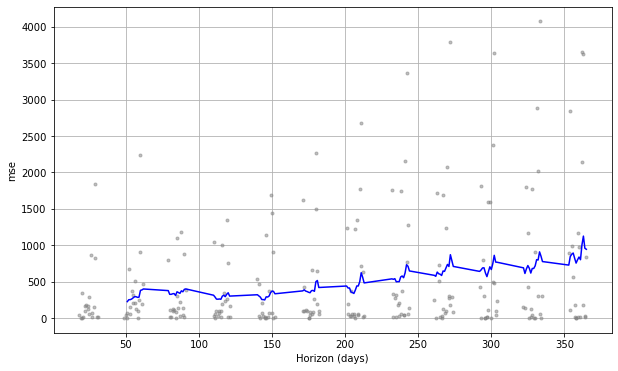

In [31]:
plot_cross_validation_metric(cv_df,metric='mse')